##*Aluna: Kamily Assis de Oliveira* (20220007356)

##Questões

1. Escreva um programa e envie ao arquivo fonte ou um link do mesmo, o qual tenha como ponto de partida uma função $a(n)$ que define o termo geral de uma sequência numérica $(a_n = a(n))$ (use $n$ como a variável do programa), que sejam fornecidos dois números naturais $(n_{\text{min}})$ e $(n_{\text{max}})$ que definem um intervalo $[n_{\text{min}}, n_{\text{max}}]$ para os índices “plotados” e que tenha duas opções exclusivas de execução:

  (a) o usuário não sabe se a sequência é convergente para um limite
$L$;

  (b) o usuário sabe que a sequência é convergente para um limite $L$.

      – Caso seja feita a escolha da opção (b), o usuario deve acrescentar também como entradas o valor do limite $L$, da tolerância ε, um ındice $N(ε)$ tais que $|a(n) − L| ≤ ε$, para todos os ındices $n$ com $n ≥ N(ε)$.



##Resolução

biblioteca + simbolos

In [ ]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

from sympy import limit_seq, symbols
from sympy import *
from sympy import symbols

In [ ]:
n, x, y, z = sympy.symbols('n x y z')

#teste
x+y-(z/n)

x + y - z/n

In [ ]:
#definindo constante de euler
e = sympy.exp(1)

#teste
e

E

In [ ]:
(n / (e **n))

#teste -> 12/(2**2)
#matematicamente funcional, mas a amostra gráfica está incorreta

n*exp(-n)

* Plotagem

In [ ]:
def limite(funcao):
  return limit_seq(funcao)

In [ ]:
def plot_seq(termo_geral,n_min, n_max):
  n_values = list(range(n_min, n_max+1))
  a_values = [termo_geral.subs('n', i) for i in n_values]

  for i, n in enumerate(n_values):
        print(f'{n}, {a_values[i]}')

  plt.scatter(n_values, a_values, marker = 'o')



*Sem o cálculo do limite*

Digite o valor mínimo de n: 5
Digite o valor máximo de n: 4


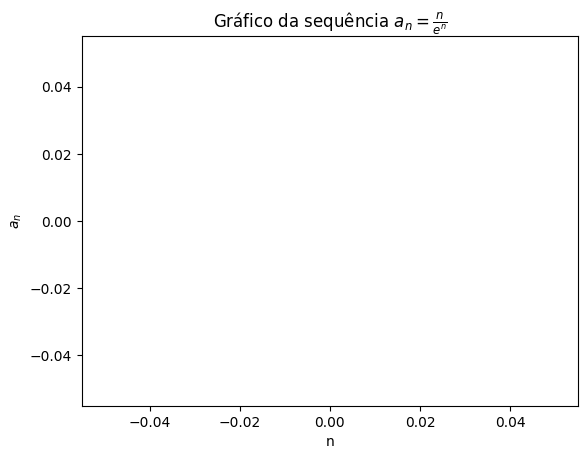

In [ ]:
def sequencia_an(n):
    return n / np.exp(n)

def plotar_grafico(nmin, nmax):
    n_values = np.arange(nmin, nmax + 1)
    an_values = sequencia_an(n_values)

    plt.plot(n_values, an_values, label=r'$\frac{n}{e^n}$')
    plt.title('Gráfico da sequência $a_n = \\frac{n}{e^n}$')
    plt.xlabel('n')
    plt.ylabel('$a_n$')
    plt.show()

nmin = int(input("Digite o valor mínimo de n: "))
nmax = int(input("Digite o valor máximo de n: "))

plotar_grafico(nmin, nmax)

**Com o cálculo do limite**

Digite o valor mínimo de n: 25
Digite o valor máximo de n: 4536


<ipython-input-69-223c337a99a2>:3: RuntimeWarning: overflow encountered in exp
  return n / np.exp(n)


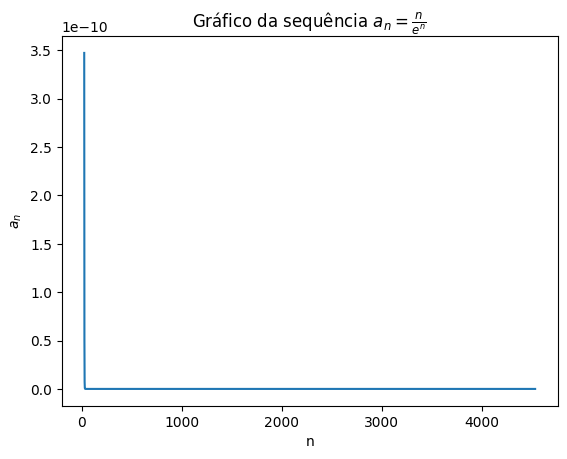

A sequência tem um limite.


In [ ]:
#sequência 2(h)
def sequencia_a(n):
    return n / np.exp(n)

#calcula o limite da sequência
def calcular_limite(n_values):
    an_values = sequencia_a(n_values)
    return np.max(np.abs(np.diff(an_values))) < 1e-6

def plotar_grafico(nmin, nmax):
    n_values = np.arange(nmin, nmax + 1)
    an_values = sequencia_a(n_values)

    plt.plot(n_values, an_values, label=r'$\frac{n}{e^n}$')
    plt.title('Gráfico da sequência $a_n = \\frac{n}{e^n}$')
    plt.xlabel('n')
    plt.ylabel('$a_n$')
    plt.show()

    #verifica se a sequência tem um limite
    tem_limite = calcular_limite(n_values)
    if tem_limite:
        print("A sequência tem um limite.")
    else:
        print("A sequência não tem um limite.")

#solicita entrada do usuário para nmin e nmax
nmin = int(input("Digite o valor mínimo de n: "))
nmax = int(input("Digite o valor máximo de n: "))

#plota o gráfico
plotar_grafico(nmin, nmax)


**Com opções do usuário** (versão completa)

Digite o valor mínimo de n: 23
Digite o valor máximo de n: 33
Escolha a opção:
(a) Não sabe se a sequência é convergente para um limite.
(b) Sabe que a sequência é convergente para um limite.
Digite a opção (a ou b): a
Tabela de pares (n, a(n)):
n		a(n)
23		2.3602323152914347e-09
24		9.060322906269835e-10
25		3.4719859662410047e-10
26		1.3283631472964644e-10
27		5.074727804655525e-11
28		1.936032029943257e-11
29		7.376630377393076e-12
30		2.807286890652052e-12
31		1.0671679036256928e-12
32		4.0525329757101367e-13
33		1.5374324278841212e-13


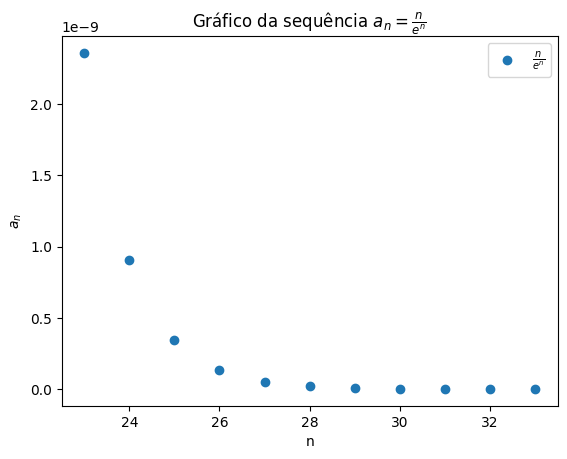

In [ ]:
def sequencia_an(n):
    return n / np.exp(n)

def calcular_limite(n_values, limite, tolerancia):
    an_values = sequencia_an(n_values)
    diferenca = np.abs(an_values - limite)
    return np.all(diferenca <= tolerancia)

#1 - (i) tabela mostrando os pares (n, a(n)) para o intervalo
def criar_tabela(n_values):
    an_values = sequencia_an(n_values)
    tabela = list(zip(n_values, an_values))
    return tabela

def plotar_grafico(nmin, nmax, opcao, limite=None, tolerancia=None):
    n_values = np.arange(nmin, nmax + 1)
    an_values = sequencia_an(n_values)

    tabela = criar_tabela(n_values)
    print("Tabela de pares (n, a(n)):")
    print("n\t\ta(n)")
    for n, an in tabela:
        print("{}\t\t{}".format(n, an))

    #1 - (ii) figura que mostra os pares de forma discreta
    plt.scatter(n_values, an_values, label=r'$\frac{n}{e^n}$', marker='o')
    plt.title('Gráfico da sequência $a_n = \\frac{n}{e^n}$')
    plt.xlabel('n')
    plt.ylabel('$a_n$')
    plt.legend()

    #1 - (iii) se b, acrescenta as retas horizontais para o intervalo
    if opcao == 'b':
        if limite is None or tolerancia is None:
            print("Erro: Para a opção (b), você precisa fornecer o valor do limite e a tolerância.")
            return
        plt.axhline(limite - tolerancia, color='r', linestyle='--', label='$L - \epsilon$')
        plt.axhline(limite, color='g', linestyle='--', label='$L$')
        plt.axhline(limite + tolerancia, color='b', linestyle='--', label='$L + \epsilon$')
        plt.show()

nmin = int(input("Digite o valor mínimo de n: "))
nmax = int(input("Digite o valor máximo de n: "))
opcao = input("Escolha a opção:\n(a) Não sabe se a sequência é convergente para um limite.\n(b) Sabe que a sequência é convergente para um limite.\nDigite a opção (a ou b): ").lower()

if opcao == 'a':
    plotar_grafico(nmin, nmax, opcao)
elif opcao == 'b':
    limite = float(input("Digite o valor do limite (L): "))
    tolerancia = float(input("Digite o valor da tolerância (ε): "))
    plotar_grafico(nmin, nmax, opcao, limite, tolerancia)
else:
    print("Opção inválida. Por favor, escolha 'a' ou 'b'.")
